In [86]:
#Se importan librerías
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.graph_objects as go
from dateutil.relativedelta import relativedelta
import datetime

In [87]:
#Se lee el dataframe
df = pd.read_csv('credit_card_transactions.csv', usecols=lambda column: column != 'Unnamed: 0')

In [88]:
# Convertir la columna 'dob' a datetime
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Obtener la fecha de hoy
hoy = datetime.datetime.today()

# Crear la columna 'age' calculando la diferencia en años
df['age'] = df['dob'].apply(lambda x: relativedelta(hoy, x).years)

# Definir los límites de las clasificaciones de edad
bins_2 = [18, 29, 49, 69, 99]  # Límites de las edades
labels_2 = ['Jóvenes adultos (19-29)', 'Adultos (30-49)', 'Adultos mayores (50-69)', 'Tercera edad (70-99)']  # Etiquetas correspondientes

# Crear la columna 'age_classification' utilizando .loc
df.loc[:, 'age_classification'] = pd.cut(df['age'], bins=bins_2, labels=labels_2, right=True)

#Reemplaza _ en la columna categorías
df['category'] = df['category'].str.replace('_',' ') 

#se filtra por fraude y por eventos que no son fraudes
filter_frauds = df.query('is_fraud == 1')
filter_normal = df.query('is_fraud == 0')

## Tendencias en el consumo por edades 

In [89]:

#Se crea el df normal_age que asoaia la categoría de consumo y la edad
normal_age = filter_normal.groupby(['age_classification', 'category'], observed=False)['category'].count().reset_index(name='count')

#Aquí se establecen las 5 categorías más comunes
top_5_categories = ['entertainment', 'food dining', 'gas transport', 'grocery net', 'grocery pos']

#Se establecen las categorías menos comunes
top_less_categories = ['misc pos', 'personal care', 'shopping net', 'shopping pos', 'travel'] 

#Se filtra la relación edad y categoría, por las categorías más consumidas
most_consumpted_age = normal_age[normal_age['category'].isin(top_5_categories)]

In [90]:
#Se cuentan los fraudes por categoría
fraude_categoría = filter_frauds.groupby('category')['is_fraud'].count().reset_index().sort_values(by = 'is_fraud', ascending=False)

In [91]:
# Agrupar por género y categoría, contando las ocurrencias
normal_genero = filter_normal.groupby(['gender', 'category'])['category'].count().reset_index(name='count')

# Ordenar el DataFrame por género y luego por cuenta
normal_genero = normal_genero.sort_values(by=['gender', 'count'], ascending=[True, False])

# Se hace una tabla pivote para obtener una columna por género ('F' y 'M') con sus respectivos conteos
normal_genero_pivot = normal_genero.pivot_table(index='category', columns='gender', values='count', fill_value=0).reset_index()
top_category_gender = normal_genero_pivot.head(5)
less_category_gender = normal_genero_pivot.tail(5)

In [92]:
# Agrupar y contar las categorías por ciudad
normal_lugar = filter_normal.groupby(['city', 'category'])['category'].count().reset_index(name='count')
top_cinco_ciudades = (normal_lugar
                      .sort_values(by=['category', 'count'], ascending=[True, False])  # Ordenar por categoría y luego por conteo
                      .groupby('category')  # Agrupar por categoría
                      .head(10)  # Tomar las 5 primeras filas de cada grupo
                     )

In [93]:
ciudades_entertainment = top_cinco_ciudades.query('category == "entertainment"')
ciudades_food = top_cinco_ciudades.query('category == "food dining"')
ciudades_gas = top_cinco_ciudades.query('category == "gas transport"')
ciudades_grocery_net = top_cinco_ciudades.query('category == "grocery net"')
ciudades_grocery_pos = top_cinco_ciudades.query('category == "grocery pos"')
ciudades_health_fitness = top_cinco_ciudades.query('category == "health fitness"')
ciudades_home = top_cinco_ciudades.query('category == "home"')
ciudades_kids = top_cinco_ciudades.query('category == "kids pets"')
ciudades_misc_net = top_cinco_ciudades.query('category == "misc net"')
ciudades_misc_pos = top_cinco_ciudades.query('category == "misc pos"')
ciudades_personal = top_cinco_ciudades.query('category == "personal care"')
ciudades_shopping_net = top_cinco_ciudades.query('category == "shopping net"')
ciudades_shopping_pos = top_cinco_ciudades.query('category == "shopping pos"')
ciudades_travel = top_cinco_ciudades.query('category == "travel"')

In [94]:
#Grafico de barras
def graficas_barras (df, column_1, column_2, colors, title, xlabel, ylabel, orientation):
    fig = go.Figure(data=[
        go.Bar(
            x=df[column_1],  # Cambiar a valores del DataFrame
            y=df[column_2],  # Cambiar a valores del DataFrame
            orientation=orientation,
            marker=dict(color=colors, line=dict(color='black', width=0.5)),
            #customdata=df[column_2],
            #hovertemplate='No. fraudes %{customdata}<extra></extra>'
        )
    ])
    fig.update_layout(
    title={
        'text': title,
        'font': {
            'family': 'Roboto',
            'size': 24,
            'color': 'black'
            },
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'pad': {'b': 90}
        },
    xaxis_title={
            'text': xlabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
            }
            },
    yaxis_title={
        'text': ylabel,
        'font': {
            'family': 'Roboto',
            'size': 18,
                'color': 'black'
                },
            'standoff': 10    
            },
    yaxis=dict(automargin=True),
    template='plotly_white',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Roboto",
        font_color='black'
        ),
    margin=dict(l=70, r=30, t=75, b=30),
    width=850,
    height=450
    )
    
    return fig
    
# Crear la gráfica de barras apiladas con Plotly

def graficas_barras_apiladas (df,name_legend_x, name_legend_y, column_1, column_2, column_3, title, xlabel, ylabel):
    fig = go.Figure(data=[
        go.Bar(name=name_legend_x, x=df[column_1], y=df[column_2], marker_color='#5b3e80'),
        go.Bar(name=name_legend_y, x=df[column_1], y=df[column_3], marker_color='#9b6ba9')
        ])
    fig.update_layout(
        title={
            'text': title,
            'font': {
                'family': 'Roboto',
                'size': 24,
                'color': 'black'
                },
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'pad': {'b': 90}
            },
        xaxis_title={
            'text': xlabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
                }
            },
        yaxis_title={
            'text': ylabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
                },
            'standoff': 10   
            },
        yaxis=dict(automargin=True),
        template='plotly_white',
        hoverlabel=dict(
            bgcolor="white",
            font_size=16,
            font_family="Roboto",
            font_color='black'
            ),
        margin=dict(l=70, r=30, t=75, b=30),
        width=900,
        height=450
        )
    
    return fig

### Distribución de Fraudes por Categoría de Compra

In [95]:
#Se calcula la tasa de fraude por categoría
total_events_by_category = df.groupby('category').size().reset_index(name='total_events')
merged_rate = pd.merge(fraude_categoría, total_events_by_category, on='category')
merged_rate['rate'] = (merged_rate['is_fraud'] / merged_rate['total_events'] * 100).round(2)
merged_rate = merged_rate.sort_values(by='rate', ascending=False)

#Se grafica la distribución de fraudes por Categoría
graficas_barras(fraude_categoría, 'is_fraud', 'category',
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                 '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'],
                'Distribución de Fraudes por Categoría', 'Cantidad', 'Categoría', 'h')

#Se grafica la tasa de fraudes por Categoría
graficas_barras(merged_rate, 'rate', 'category',
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                 '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'],
                'Tasa de Fraudes por Categoría', 'Tasa', 'Categoría', 'h')

*Comentarios:* Las categorías grocery pos, shopping net, misc net, shopping pos y gas transport son las categorías en las que mmás registros de fraudes se han presentado. Aunque es importante destacar que estas no son las categorías más populares, a exepción de gas transport y grocery pos. 

Food dining y entertainment: aunque son de los servicios más consumidos, tienen realmente muy bajos indices de fraude, lo cual es bastante destacable. Apenas el 0.25% (233) de los movimientos de la categoría entertainment son fraudes, y en el caso de food dining el 0.17% (151). 

Mientras que en otras categorías como shopping net el 1.76% (1.713) de los movimientos son fraudes, en misc net es el 1.45% (915) y en grocery pos es el 1.41% (1743).

En esa medida, aunque por cifras grocery pos es la categoría de consumo con mayor número de fraudes, shopping net presenta un peor escenario. 


### Distribución por ciudad

In [96]:
travel = graficas_barras(ciudades_travel, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Travel', 'Cantidad', 'Ciudades', 'v')

entertainment = graficas_barras(ciudades_entertainment, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Entertainment', 'Cantidad', 'Ciudades', 'v')

food = graficas_barras(ciudades_food, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Food Dining', 'Cantidad', 'Ciudades', 'v')

gas = graficas_barras(ciudades_gas, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Gas Transport', 'Cantidad', 'Ciudades', 'v')

grocery_net = graficas_barras(ciudades_grocery_net, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Grocery Net', 'Cantidad', 'Ciudades', 'v')

grocery_pos = graficas_barras(ciudades_grocery_pos, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Grocery Pos', 'Cantidad', 'Ciudades', 'v')

health_fitness = graficas_barras(ciudades_health_fitness, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Health Fitness', 'Cantidad', 'Ciudades', 'v')

home = graficas_barras(ciudades_home, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Home', 'Cantidad', 'Ciudades', 'v')

kids = graficas_barras(ciudades_kids, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Kids', 'Cantidad', 'Ciudades', 'v')

misc_net = graficas_barras(ciudades_misc_net, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Misc Net', 'Cantidad', 'Ciudades', 'v')

misc_pos = graficas_barras(ciudades_misc_pos, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Misc Pos', 'Cantidad', 'Ciudades', 'v')

personal = graficas_barras(ciudades_personal, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Personal Care', 'Cantidad', 'Ciudades', 'v')

shopping_net = graficas_barras(ciudades_shopping_net, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Shopping Net', 'Cantidad', 'Ciudades', 'v')

shopping_pos = graficas_barras(ciudades_shopping_pos, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Shopping Pos', 'Cantidad', 'Ciudades', 'v')

In [97]:
misc_net

In [98]:
shopping_net

In [99]:
grocery_pos

**Comentarios:** Se generó una gráfica sobre las ciudades que más consumen por caterogía.

En el caso de las categorías con mayor número de Fraudes: 

- Misc Net: Fulton, Birmingham, San Antonio, Cleveland y Utica. 
- Shopping_net: Meridian, Phoenix, San Antonio, Houston, Birmingham
- Grocery_pos: Birmingham, Utica, Meridian, Warren, Thomas

Puede ser interesante contrastar esta información para ver si en estos lugares también hay una mayor concentración de fraudes. 


### Distribución de compras por Género

In [107]:
normal_genero = graficas_barras_apiladas (normal_genero_pivot, 'femenine', 'masculine', 'category', 'F', 'M', 
                          'Distribución de Consumo por Género y Categoría', 'Categoría', 'Cantindad')

less_gender = graficas_barras_apiladas (less_category_gender, 'femenine', 'masculine', 'category', 'F', 'M', 
                          'Top 5 de Categorías Menos Consumidas por Género', 'Categoría', 'Cantindad')

top_gender = graficas_barras_apiladas(top_category_gender, 'femenine', 'masculine', 'category', 'F', 'M', 
                          'Top 5 de Categorías Más Consumidas por Género', 'Categoría', 'Cantindad')

In [110]:
normal_genero

In [109]:
less_gender

In [108]:
top_gender

### Tendencias en Consumos por Edad y Categoría

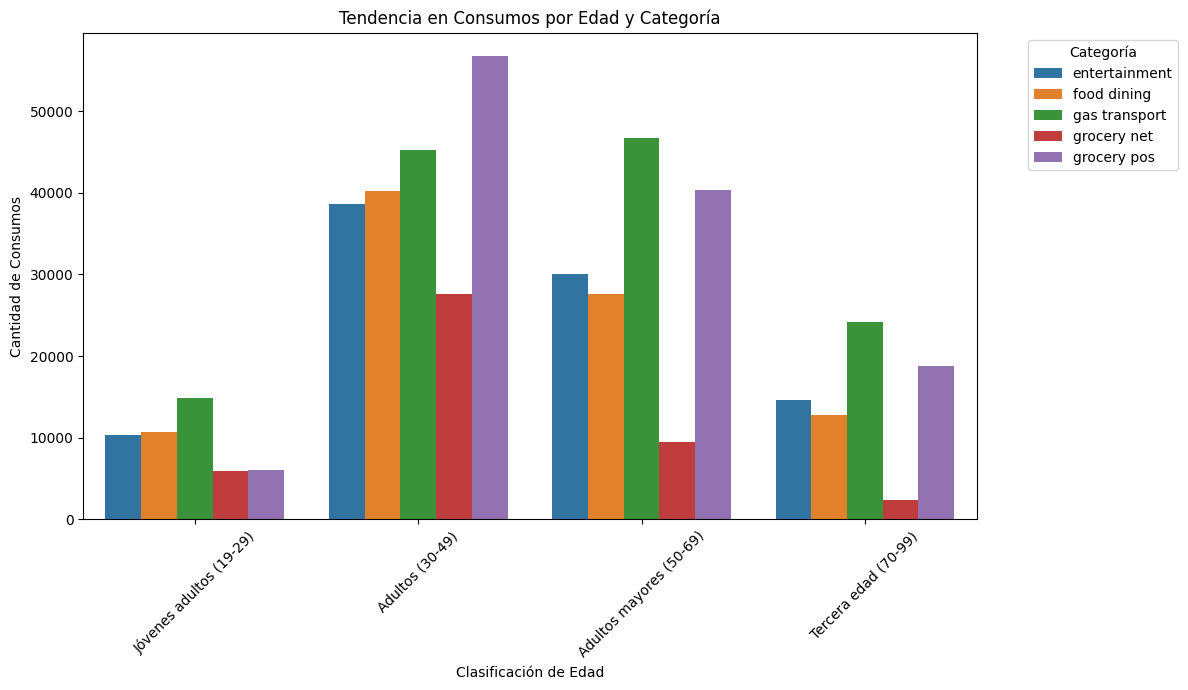

In [101]:
# Graficar
plt.figure(figsize=(12, 7))
sb.barplot(data=most_consumpted_age, x='age_classification', y='count', hue='category')

plt.title('Tendencia en Consumos por Edad y Categoría')
plt.xlabel('Clasificación de Edad')
plt.ylabel('Cantidad de Consumos')
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()